# EDA

In [135]:
import pandas as pd
import matplotlib.pyplot as plt

# load the data
df = pd.read_csv('clean_data/cleaned_data.csv')

# change name of columns: 
# legal_entity_name	to company, and period_end_date	to date


# sort the data by date and company

df = df.sort_values(by=['period_end_date', 'company'])

KeyError: 'date'

In [ ]:
# amount of companies


### Time series for one company: Estee Lauder

/var/folders/05/z6mtxwt90_7_xdbfz4zyq8j80000gn/T/ipykernel_41499/3605915162.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estee_lauder_df.sort_values('period_end_date', inplace=True)


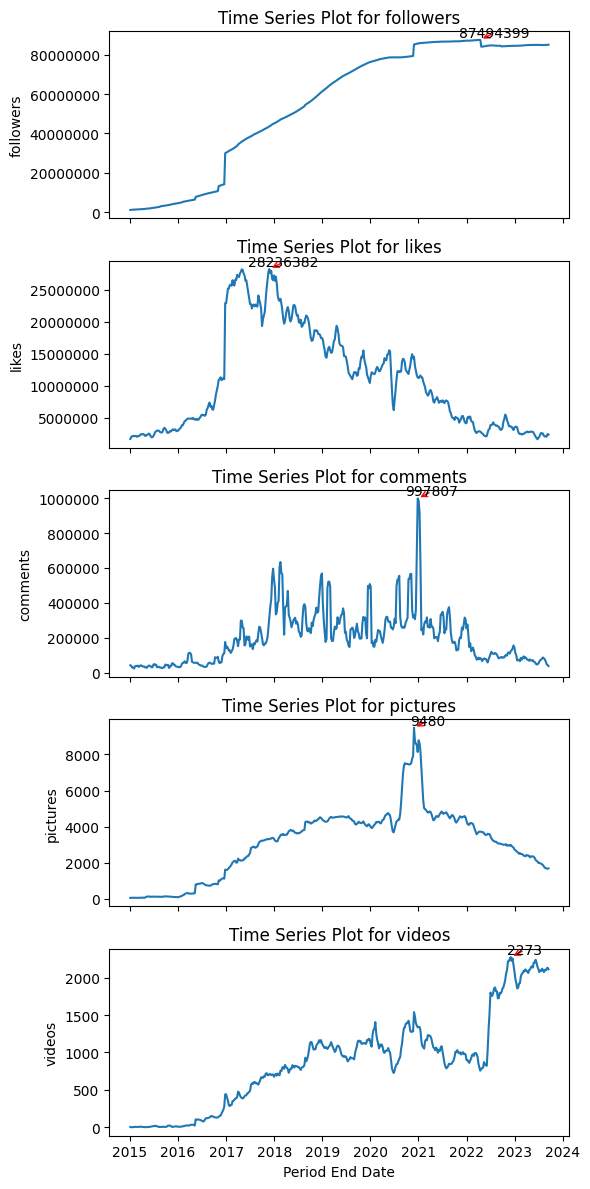

In [134]:
estee_lauder_df = df[df['legal_entity_name'] == "Estee Lauder"]

# Metrics to plot
metrics = ['followers', 'likes', 'comments', 'pictures', 'videos']

# Plotting
fig, axs = plt.subplots(len(metrics), 1, figsize=(6, 12), sharex=True)

for i, metric in enumerate(metrics):
    axs[i].plot(estee_lauder_df['period_end_date'], estee_lauder_df[metric], linestyle='-')
    axs[i].set_title(f'Time Series Plot for {metric}')
    axs[i].set_ylabel(metric)
    # Disable scientific notation
    axs[i].ticklabel_format(style='plain', axis='y')
    
    # Find and annotate the maximum point
    max_value = estee_lauder_df[metric].max()
    max_date = estee_lauder_df[estee_lauder_df[metric] == max_value]['period_end_date'].iloc[0]
    axs[i].annotate(f'{max_value}', xy=(max_date, max_value), xytext=(10, 0), 
                    textcoords='offset points', ha='center', va='bottom',
                    arrowprops=dict(arrowstyle='->', color='red'))

plt.xlabel('Period End Date')
plt.tight_layout()
plt.show()

In [113]:
# unique companies count
df['legal_entity_name'].nunique()

214